# Plot history

In this file, we are going to plot the results of our simulation.

We will perform the following actions:
* Plot the real values of the PDE function
* Plot the estimated PDE values generated using Monte Carlo simulation

Please run the following codes:

## Table of Content

- [1 - Packages](#1)
- [2 - Plotting the results of our simulation](#2)
    - [2.1 - Load the relevant csv files](#2-1)
    - [2.2 - Plot the PDE in one dimension: fix x in {2, 3, ..., 10} and varies t within [0, x-1]](#2-2)

<a name='1'></a>
## 1 - Packages

Run the cell below to import all the libraries you'll need:

In [1]:
# From system
import os
import shutil
from pathlib import Path
import random

# Data structure
import numpy as np
import pandas as pd
import json
import csv

# Plotting graph
from matplotlib import pyplot as plt

<a name='2'></a>
## 2 - Plotting the results of our simulation

<a name='2-1'></a>
### 2.1 - Load the relevant csv files

In [2]:
np_dictionary = {}

dir_name = "results"
os_listdir = os.listdir(dir_name)
for file_name in os_listdir:
    file_path = os.path.join(dir_name, file_name)
    data =  pd.read_csv(file_path, delimiter=',', dtype=None, header=None)
    np_dictionary[file_name[:-4]] = data

<a name='2-3'></a>
### 2.2 - Plot the PDE in one dimension: fix x=3 and varies t within [0, 2]

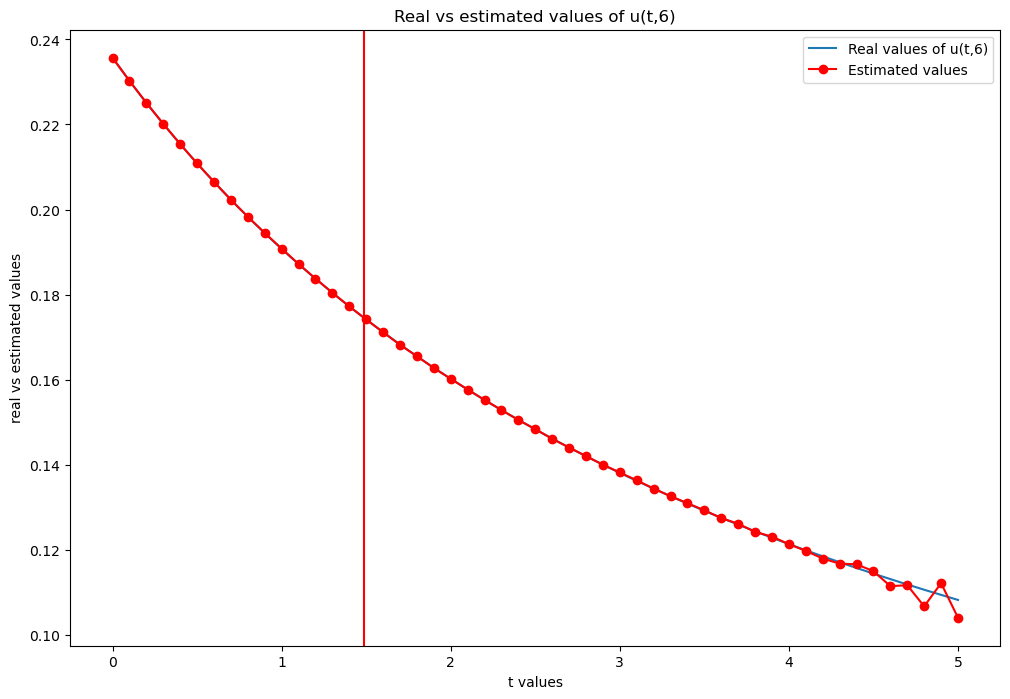

In [3]:
impose_ylim = False
y_lim = [0.1,0.2]

real_values = np.asarray(np_dictionary["analytic"])
real_values = np.reshape(real_values, (1001,))[0:501]
t_values = np.arange(0, 5.01, 0.01)
estimated_values = np.asarray(np_dictionary["monte_carlo"])
estimated_values = np.reshape(estimated_values, (51,))[0:51]
t_estimated = np.arange(0, 5.1, 0.1)

plt.figure(figsize=(12, 8))
plt.plot(t_values, real_values, label='Real values of u(t,6)')
plt.plot(t_estimated, estimated_values, 'ro-', label='Estimated values')

plt.ylabel('real vs estimated values')
if impose_ylim:
    plt.ylim(y_lim)
plt.xlabel('t values')
plt.axvline(x=1.49,color='red')

plt.title('Real vs estimated values of u(t,6)')
plt.legend(loc='upper right')
plt.show()

In [4]:
import math

t_vector = [i/100 for i in range(400)]
bound = []
for T in t_vector:
    estimated_bound = 8 * pow((pow(6+T, -1) + pow(6-T, -1)), 2) * pow((pow(6-T, -1) - pow(6+T, -1)), 2) * T * math.exp(3*T) * (1-math.exp(-2*T))
    bound.append(estimated_bound)

bound_print = [(i, bound[i]) for i in range(400)]
print(bound_print)

[(0, 0.0), (1, 5.597968062032717e-11), (2, 9.138448729465915e-10), (3, 4.7204534907361786e-09), (4, 1.5223306878711048e-08), (5, 3.792656504459464e-08), (6, 8.025776737414498e-08), (7, 1.5174588811729207e-07), (8, 2.64211389978423e-07), (9, 4.319689749426275e-07), (10, 6.720437691096208e-07), (11, 1.0044017178809114e-06), (12, 1.452195009448647e-06), (13, 2.04202338827001e-06), (14, 2.8042122661817186e-06), (15, 3.7731085871313293e-06), (16, 4.987395452286839e-06), (17, 6.4904265656624715e-06), (18, 8.33058161648795e-06), (19, 1.0561643773493786e-05), (20, 1.3243200528219645e-05), (21, 1.644106918953361e-05), (22, 2.022774839992272e-05), (23, 2.4682897115954124e-05), (24, 2.9893842570772284e-05), (25, 3.595611881578112e-05), (26, 4.297403752193517e-05), (27, 5.106129280854575e-05), (28, 6.034160195938989e-05), (29, 7.094938398241261e-05), (30, 8.303047807067736e-05), (31, 9.674290412864858e-05), (32, 0.00011225766763969976), (33, 0.00012975961126809928), (34, 0.00014944831571204014), (

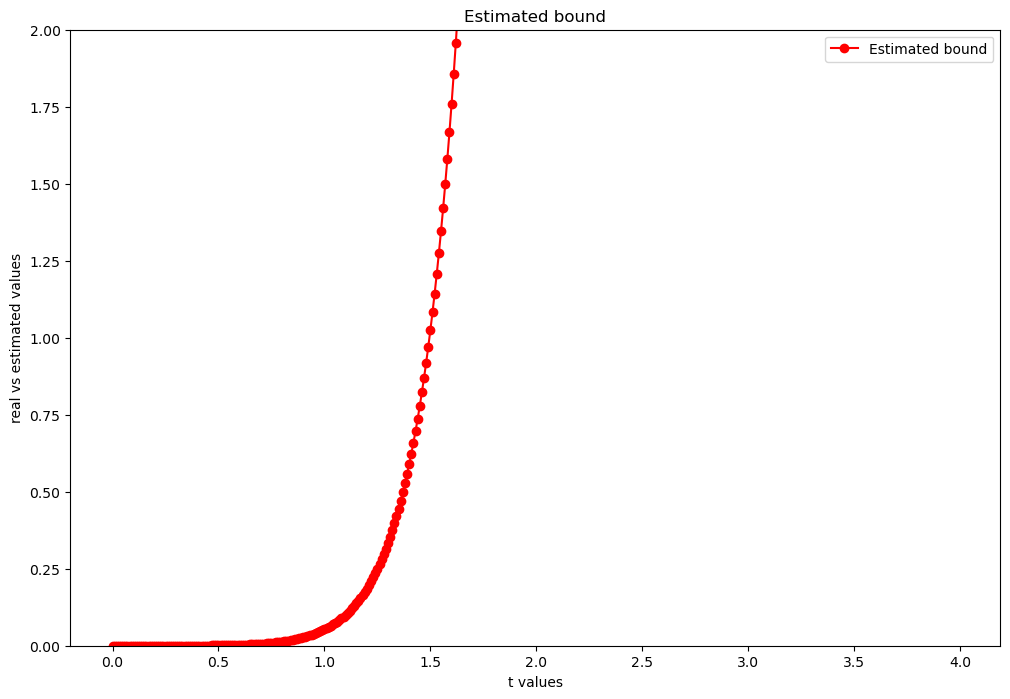

In [5]:
impose_ylim = True
y_lim = [0,2]

plt.figure(figsize=(12, 8))
plt.plot(t_vector, bound, 'ro-', label='Estimated bound')

plt.ylabel('real vs estimated values')
if impose_ylim:
    plt.ylim(y_lim)
plt.xlabel('t values')
# plt.axvline(x=30,color='red')

plt.title('Estimated bound')
plt.legend(loc='upper right')
plt.show()